In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

## Importing Libraries




# **E.D.A (Exploratory Data Analysis)**

## Reading Excel File

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IT_Consulting_Deals_Data_Global.csv')

In [ ]:
df.shape

(13130, 17)

In [ ]:
df.nunique()

,0
Deal_ID,13000
VP_Name,5
Manager_Name,5
Client_Category,5
Solution_Type,5
Deal_Date,1
Sector,5
Location,5
Deal_Cost,12610
Deal_Won_Lost,2


In [ ]:
print(df.columns)

Index(['Deal_ID', 'VP_Name', 'Manager_Name', 'Client_Category',
       'Solution_Type', 'Deal_Date', 'Sector', 'Location', 'Deal_Cost',
       'Deal_Won_Lost', 'Deal_Probability', 'Contract_Length_Months',
       'Client_Size', 'Client_Revenue', 'Solution_Price',
       'Client_Satisfaction_Score', 'Deal_Risk_Factor'],
      dtype='object')


In [ ]:
df

,Deal_ID,VP_Name,Manager_Name,Client_Category,Solution_Type,Deal_Date,Sector,Location,Deal_Cost,Deal_Won_Lost,Deal_Probability,Contract_Length_Months,Client_Size,Client_Revenue,Solution_Price,Client_Satisfaction_Score,Deal_Risk_Factor
0,2632,John Smith,David Lee,Non-Profit,Data Analytics,2023-06-22 11:09:59.030694672,Finance,Tokyo,1332011.204,Lost,0.470,44,Large,164230898.377,247548.948,5.839,Low
1,7255,Emma Johnson,Olivia Thompson,Enterprise,Data Analytics,2023-06-22 11:09:59.030694672,Healthcare,Tokyo,5300924.705,Lost,0.367,54,Medium,151685725.817,3223614.287,5.212,High
2,7591,James Wilson,Brian Martinez,Start-up,Data Analytics,2023-06-22 11:09:59.030694672,Technology,New York,563230.725,Lost,0.231,40,Medium,226885343.975,2054130.290,5.593,High
3,147,Emma Johnson,Alice Carter,Government,ERP Implementation,2023-06-22 11:09:59.030694672,Healthcare,Bangalore,4891298.878,Won,NaN,12,Medium,44794828.201,8543339.537,1.988,Low
4,6789,Emma Johnson,Alice Carter,Non-Profit,ERP Implementation,2023-06-22 11:09:59.030694672,Finance,Bangalore,1585861.045,Won,0.251,23,Large,69704319.523,2881628.609,7.566,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,2527,John Smith,Brian Martinez,Government,ERP Implementation,2023-06-22 11:09:59.030694672,Healthcare,London,3936446.602,Lost,0.976,55,Medium,150348190.136,4745825.377,NaN,Low
13126,11918,Sophia Davis,Brian Martinez,Enterprise,Data Analytics,2023-06-22 11:09:59.030694672,Energy,Sydney,2557230.193,Lost,0.272,52,Large,41913522.312,6964962.572,5.260,High
13127,1419,James Wilson,Alice Carter,Non-Profit,Data Analytics,2023-06-22 11:09:59.030694672,Finance,Tokyo,9246479.702,Lost,0.501,19,Small,386461732.855,798028.159,1.744,High
13128,3549,James Wilson,Isabella White,Enterprise,Data Analytics,2023-06-22 11:09:59.030694672,Finance,Bangalore,6267395.681,Won,0.972,47,Medium,247188395.716,4671647.747,7.166,High


In [ ]:
print(df.dtypes)

Deal_ID                        int64
VP_Name                       object
Manager_Name                  object
Client_Category               object
Solution_Type                 object
Deal_Date                     object
Sector                        object
Location                      object
Deal_Cost                    float64
Deal_Won_Lost                 object
Deal_Probability             float64
Contract_Length_Months         int64
Client_Size                   object
Client_Revenue               float64
Solution_Price               float64
Client_Satisfaction_Score    float64
Deal_Risk_Factor              object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Deal_ID                    13130 non-null  int64  
 1   VP_Name                    13130 non-null  object 
 2   Manager_Name               13130 non-null  object 
 3   Client_Category            13130 non-null  object 
 4   Solution_Type              13130 non-null  object 
 5   Deal_Date                  13130 non-null  object 
 6   Sector                     13130 non-null  object 
 7   Location                   13130 non-null  object 
 8   Deal_Cost                  12735 non-null  float64
 9   Deal_Won_Lost              13130 non-null  object 
 10  Deal_Probability           12738 non-null  float64
 11  Contract_Length_Months     13130 non-null  int64  
 12  Client_Size                13130 non-null  object 
 13  Client_Revenue             13130 non-null  flo

## Summary of Numerical Variable

In [ ]:
df.describe()

,Deal_ID,Deal_Cost,Deal_Probability,Contract_Length_Months,Client_Revenue,Solution_Price,Client_Satisfaction_Score
count,13130.000,12735.000,12738.000,13130.000,13130.000,13130.000,12738.000
mean,6500.469,5241545.564,0.550,32.473,249048067.268,5027846.139,5.527
std,3751.994,3692678.550,0.260,15.488,143935592.055,2874070.710,2.594
min,1.000,100499.009,0.100,6.000,1121773.364,50737.673,1.000
25%,3253.250,2587192.352,0.325,19.000,126546337.992,2537410.718,3.310
50%,6502.500,5113906.930,0.548,32.000,246828132.669,5027832.766,5.517
75%,9744.750,7584935.355,0.778,46.000,372749828.030,7544762.089,7.767
max,13000.000,49803371.923,1.000,59.000,499898340.859,9999720.019,9.998



## Summary of Categorical Variable

In [ ]:
df.describe(include='O')

,VP_Name,Manager_Name,Client_Category,Solution_Type,Deal_Date,Sector,Location,Deal_Won_Lost,Client_Size,Deal_Risk_Factor
count,13130,13130,13130,13130,13130,13130,13130,13130,13130,13130
unique,5,5,5,5,1,5,5,2,3,3
top,Emma Johnson,David Lee,Government,Data Analytics,2023-06-22 11:09:59.030694672,Technology,Sydney,Lost,Medium,High
freq,2683,2688,2705,2710,13130,2699,2666,6565,4409,4425


In [ ]:
df.dtypes

,0
Deal_ID,int64
VP_Name,object
Manager_Name,object
Client_Category,object
Solution_Type,object
Deal_Date,object
Sector,object
Location,object
Deal_Cost,float64
Deal_Won_Lost,object


In [ ]:
#List of categorical variables
cat_data=['Client_Category', 'Solution_Type', 'Sector', 'Location',
          'Client_Size', 'Deal_Risk_Factor']

In [ ]:
#List of numerical variables
num_data=[ 'Deal_Cost', 'Deal_Probability', 'Contract_Length_Months',
          'Client_Revenue' ,'Solution_Price', 'Client_Satisfaction_Score']

In [ ]:
#Target variable
target=['Deal_Won_Lost']

In [ ]:
#VP + Manager Names
Names_data=['VP_Name', 'Manager_Name']

In [ ]:
df[target].value_counts(normalize=True)*100

,proportion
Deal_Won_Lost,
Lost,50.000
Won,50.000


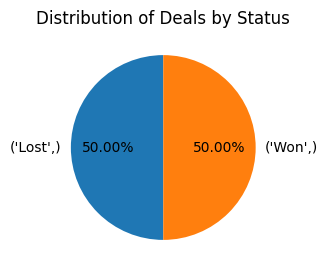

In [ ]:
labels = df[target].value_counts().index.tolist()
sizes = df[target].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by Status')
plt.show()

## For Count of Categorical Data

In [ ]:
for fet in cat_data:
    df[fet] = df[fet].astype('category')

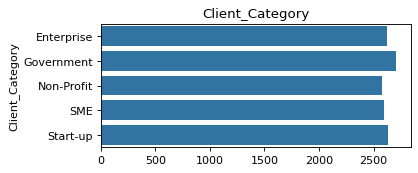

Client_Category
Government    2705
Start-up      2629
Enterprise    2626
SME           2594
Non-Profit    2576
Name: count, dtype: int64


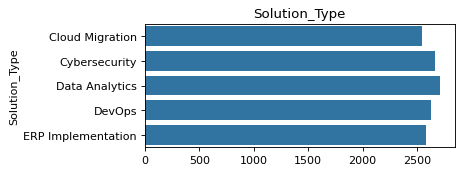

Solution_Type
Data Analytics        2710
Cybersecurity         2666
DevOps                2627
ERP Implementation    2585
Cloud Migration       2542
Name: count, dtype: int64


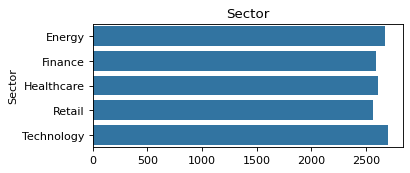

Sector
Technology    2699
Energy        2669
Healthcare    2612
Finance       2592
Retail        2558
Name: count, dtype: int64


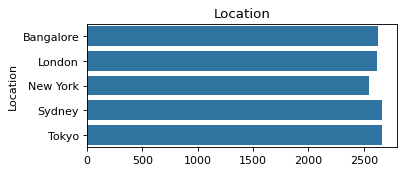

Location
Sydney       2666
Tokyo        2661
Bangalore    2630
London       2623
New York     2550
Name: count, dtype: int64


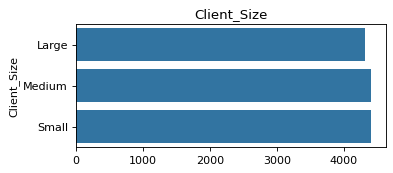

Client_Size
Medium    4409
Small     4400
Large     4321
Name: count, dtype: int64


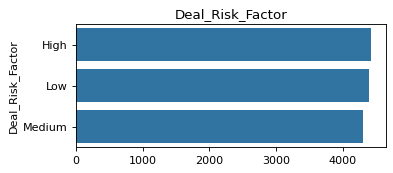

Deal_Risk_Factor
High      4425
Low       4397
Medium    4308
Name: count, dtype: int64


In [ ]:
from matplotlib.pyplot import figure
for i in cat_data:
    figure(figsize=(5, 2), dpi=80)
    sns.barplot(
        x=df[i].value_counts().values,
        y=df[i].value_counts().index
    ).set_title(i)

    plt.show()  # Display the plot
    print(df[i].value_counts())  # Print value counts


## Pie Chart for Categorical Data

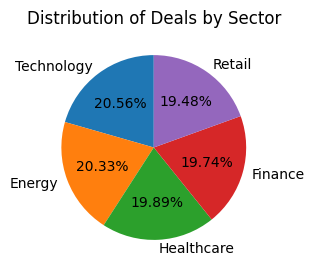

In [ ]:
labels = df['Sector'].value_counts().index.tolist()
sizes = df['Sector'].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by Sector')
plt.show()

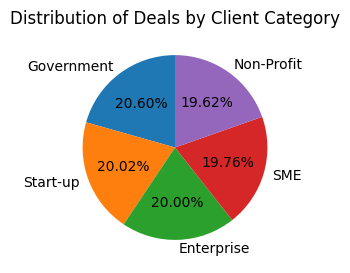

In [ ]:
labels = df['Client_Category'].value_counts().index.tolist()
sizes = df['Client_Category'].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by Client Category')
plt.show()

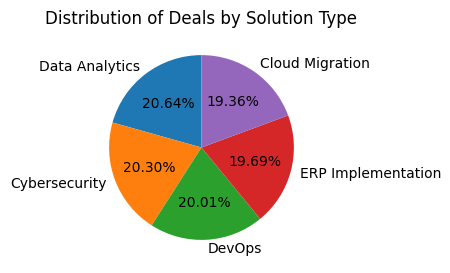

In [ ]:
labels = df['Solution_Type'].value_counts().index.tolist()
sizes = df['Solution_Type'].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by Solution Type')
plt.show()

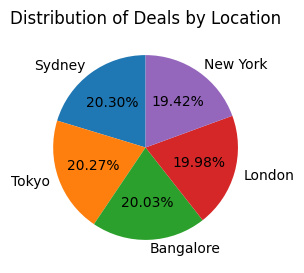

In [ ]:
labels = df['Location'].value_counts().index.tolist()
sizes = df['Location'].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by Location')
plt.show()

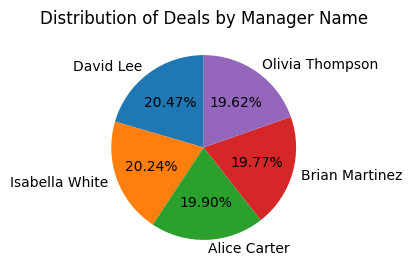

In [ ]:
labels = df['Manager_Name'].value_counts().index.tolist()
sizes = df['Manager_Name'].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by Manager Name')
plt.show()

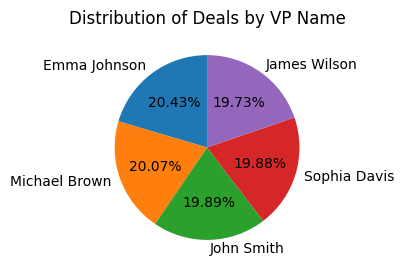

In [ ]:
labels = df['VP_Name'].value_counts().index.tolist()
sizes = df['VP_Name'].value_counts().values.tolist()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Deals by VP Name')
plt.show()

## Pivot Table of Categorical Data and their Status

In [ ]:
print(pd.pivot_table(df, index = 'Deal_Won_Lost', columns = 'Sector',
                     values = 'Deal_Cost' ))

Sector             Energy     Finance  Healthcare      Retail  Technology
Deal_Won_Lost                                                            
Lost          5227722.745 5251728.263 5223998.954 5284742.542 5049240.455
Won           5187647.892 5185937.508 5266322.356 5382947.861 5365336.947


In [ ]:
print(pd.pivot_table(df, index = 'Deal_Won_Lost', columns = 'Client_Category',
                     values = 'Deal_Cost' ))

Client_Category  Enterprise  Government  Non-Profit         SME    Start-up
Deal_Won_Lost                                                              
Lost            5181425.973 5118290.614 5197960.573 5268673.440 5267867.909
Won             5313296.765 5341255.799 5374973.813 5167898.596 5184291.467


In [ ]:
print(pd.pivot_table(df, index = 'Deal_Won_Lost', columns = 'Solution_Type',
                     values = 'Deal_Cost' ))

Solution_Type  Cloud Migration  Cybersecurity  Data Analytics      DevOps  \
Deal_Won_Lost                                                               
Lost               5111309.431    5267515.083     5170343.987 5279548.522   
Won                5256438.161    5221197.513     5288930.350 5215796.943   

Solution_Type  ERP Implementation  
Deal_Won_Lost                      
Lost                  5198970.643  
Won                   5399196.637  


In [ ]:
print(pd.pivot_table(df, index = 'Deal_Won_Lost', columns = 'Location',
                     values = 'Deal_Cost' ))

Location        Bangalore      London    New York      Sydney       Tokyo
Deal_Won_Lost                                                            
Lost          5238834.843 5187780.455 5096071.703 5348100.997 5157704.053
Won           5428668.656 5149388.267 5336498.813 5262894.580 5210682.696


In [ ]:
print(pd.pivot_table(df, index = 'Deal_Won_Lost', columns = 'Client_Size',
                     values = 'Deal_Cost' ))

Client_Size         Large      Medium       Small
Deal_Won_Lost                                    
Lost          5234863.037 5184963.141 5199211.391
Won           5366068.514 5110486.113 5356574.789


In [ ]:
print(pd.pivot_table(df, index = 'Deal_Won_Lost', columns = 'Deal_Risk_Factor',
                     values = 'Deal_Cost' ))

Deal_Risk_Factor        High         Low      Medium
Deal_Won_Lost                                       
Lost             5099383.930 5171834.218 5348493.163
Won              5323638.725 5254842.160 5251848.995


## Outlier Detection (Box Plot)

<Axes: xlabel='Deal_Cost'>

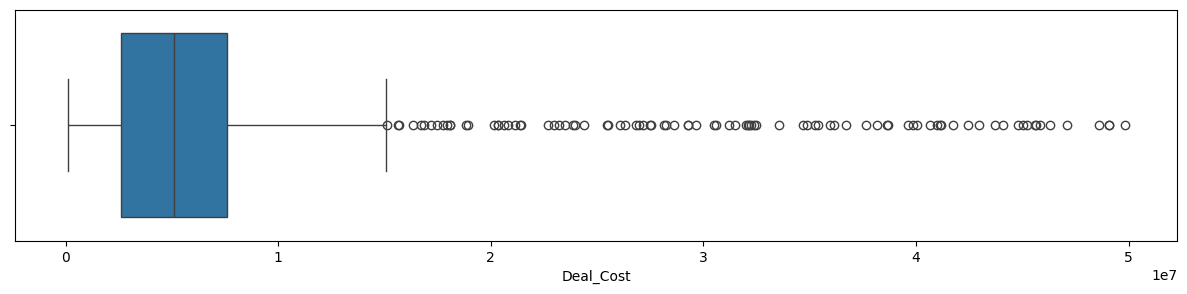

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df['Deal_Cost'], orient='h')

<Axes: xlabel='Deal_Probability'>

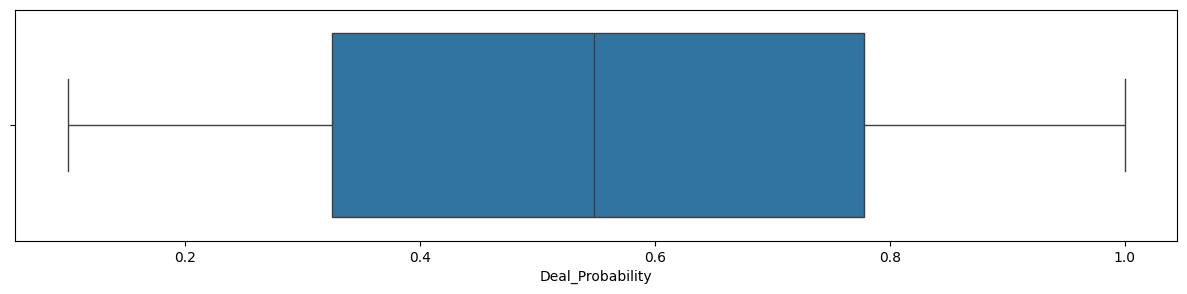

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df['Deal_Probability'], orient='h')

<Axes: xlabel='Contract_Length_Months'>

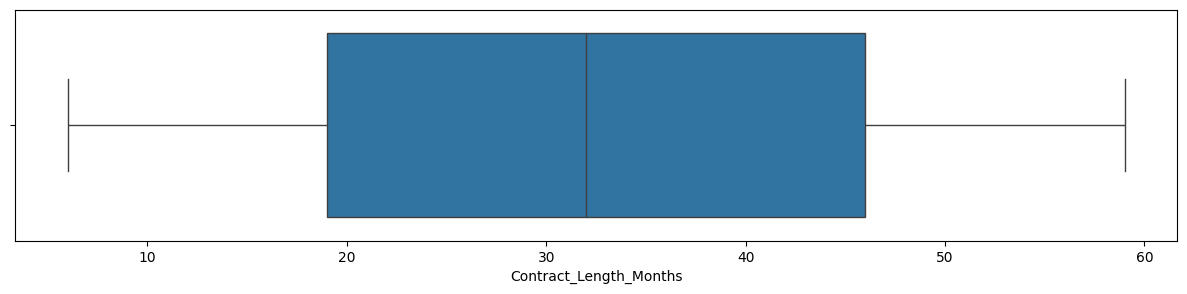

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df['Contract_Length_Months'], orient='h')

<Axes: xlabel='Client_Revenue'>

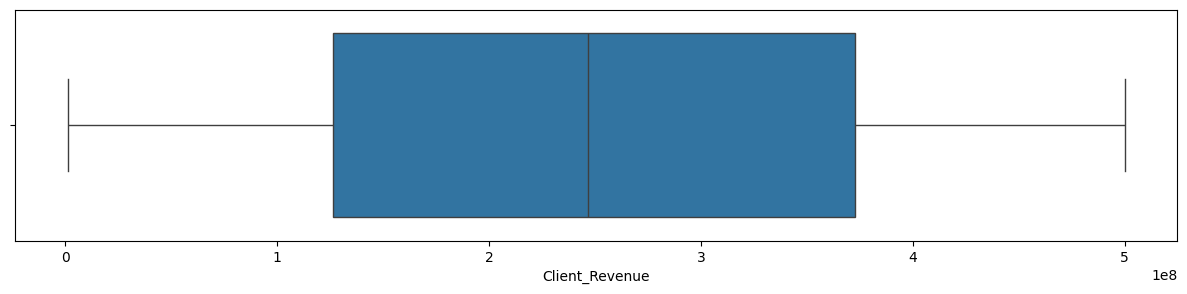

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df['Client_Revenue'], orient='h')

<Axes: xlabel='Solution_Price'>

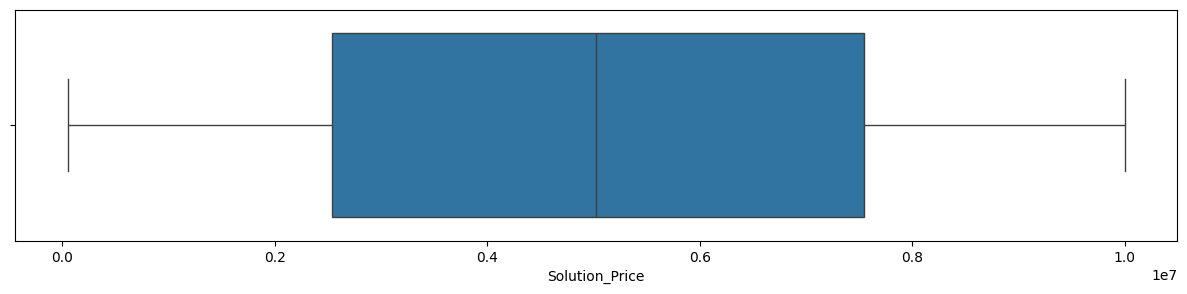

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df['Solution_Price'], orient='h')

<Axes: xlabel='Client_Satisfaction_Score'>

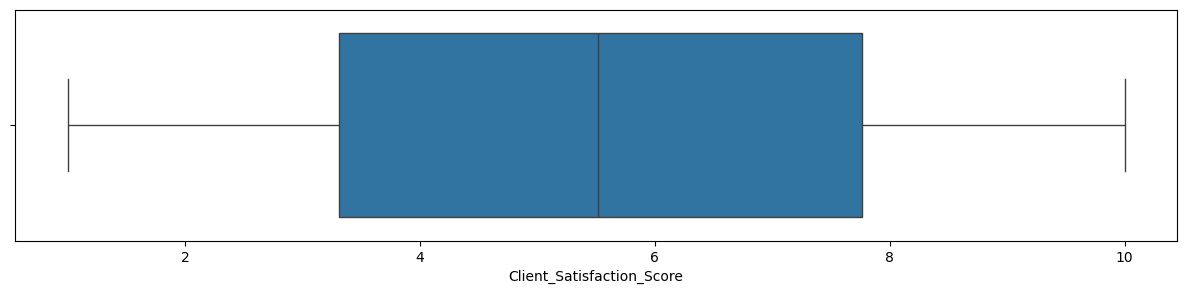

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(df['Client_Satisfaction_Score'], orient='h')


## Checking the relation between 'Deal Status Code' with different variables

<Axes: xlabel='Client_Category'>

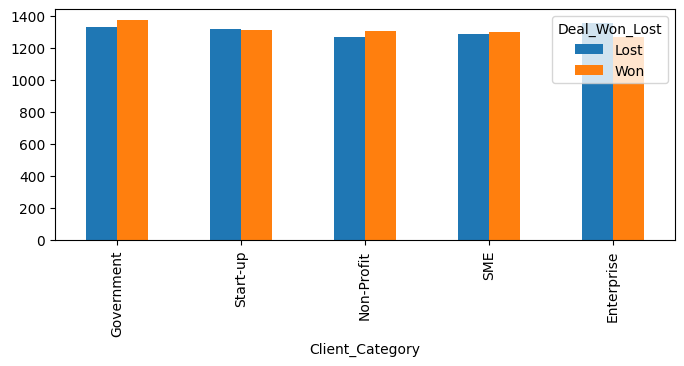

In [ ]:
rel_cat_type=df.groupby(['Deal_Won_Lost', 'Client_Category']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Client_Category', values = 0)
rel_cat_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='Solution_Type'>

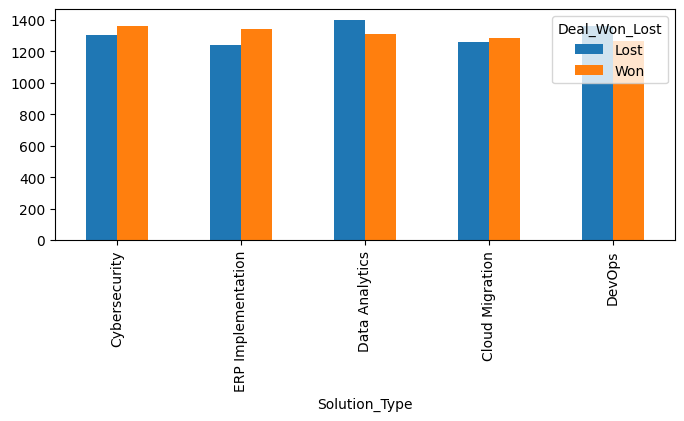

In [ ]:
rel_solution_type=df.groupby(['Deal_Won_Lost', 'Solution_Type']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Solution_Type', values = 0)
rel_solution_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='Sector'>

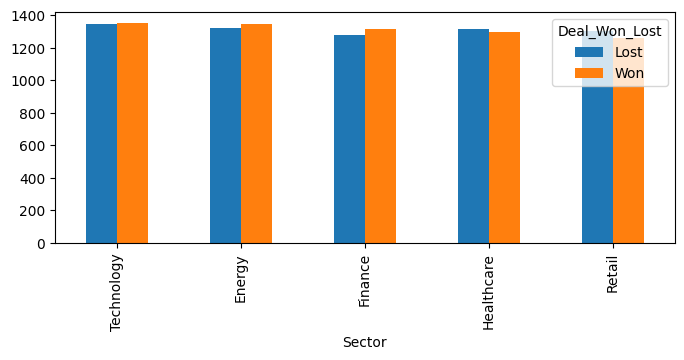

In [ ]:
rel_sect_type=df.groupby(['Deal_Won_Lost', 'Sector']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Sector', values = 0)
rel_sect_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='Location'>

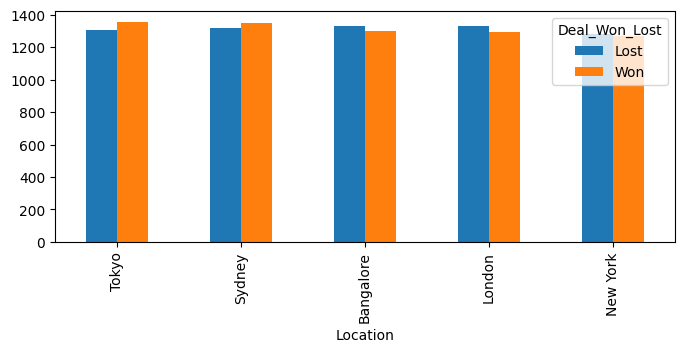

In [ ]:
rel_loct_type=df.groupby(['Deal_Won_Lost', 'Location']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Location', values = 0)
rel_loct_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='Client_Size'>

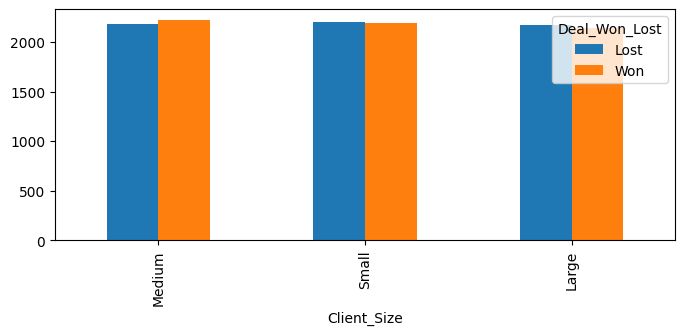

In [ ]:
rel_cltsz_type=df.groupby(['Deal_Won_Lost', 'Client_Size']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Client_Size', values = 0)
rel_cltsz_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='Deal_Risk_Factor'>

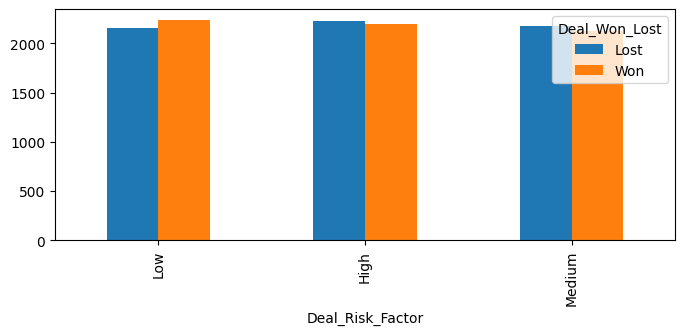

In [ ]:
rel_drf_type=df.groupby(['Deal_Won_Lost', 'Deal_Risk_Factor']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Deal_Risk_Factor', values = 0)
rel_drf_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='VP_Name'>

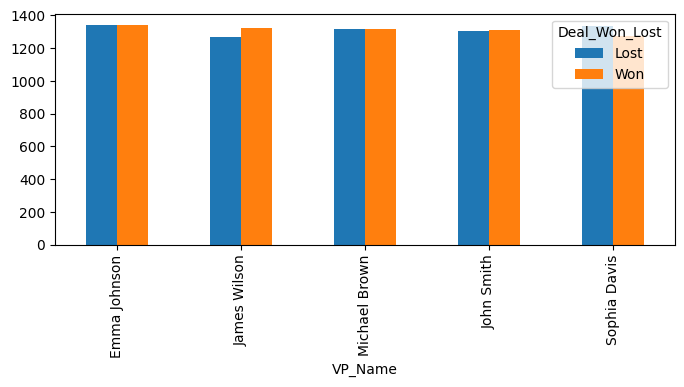

In [ ]:
rel_Vp_type=df.groupby(['Deal_Won_Lost', 'VP_Name']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'VP_Name', values = 0)
rel_Vp_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

<Axes: xlabel='Manager_Name'>

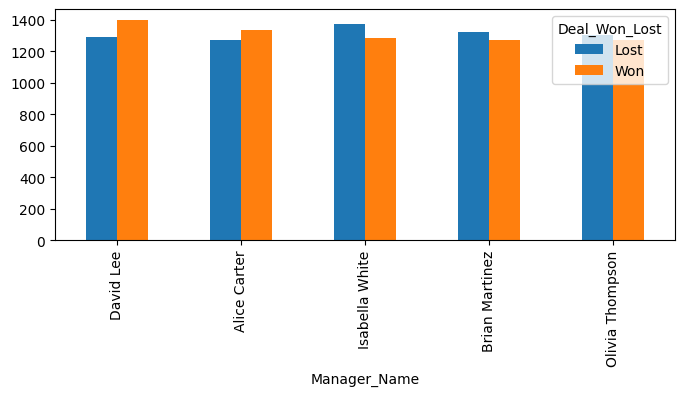

In [ ]:
rel_MN_type=df.groupby(['Deal_Won_Lost', 'Manager_Name']).size().reset_index().pivot(columns = 'Deal_Won_Lost', index = 'Manager_Name', values = 0)
rel_MN_type.sort_values(by=['Won'],ascending=False).plot(kind='bar',figsize=(8, 3))

# **Pre - Processing**

## Dealing With missing Values

In [ ]:
df.isnull().sum()

,0
Deal_ID,0
VP_Name,0
Manager_Name,0
Client_Category,0
Solution_Type,0
Deal_Date,0
Sector,0
Location,0
Deal_Cost,395
Deal_Won_Lost,0


In [ ]:
df.isnull().sum().sum()

1179

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Deal_ID,0
VP_Name,0
Manager_Name,0
Client_Category,0
Solution_Type,0
Deal_Date,0
Sector,0
Location,0
Deal_Cost,0
Deal_Won_Lost,0


In [ ]:
df.shape

(11997, 17)

## Dealing with Duplicates

In [ ]:
x=df[df.duplicated(subset=('Deal_ID',	'VP_Name',	'Manager_Name',	'Client_Category',	'Solution_Type',	'Deal_Date',	'Sector',	'Location',	'Deal_Cost',	'Deal_Won_Lost', 'Deal_Probability', 'Contract_Length_Months', 'Client_Size', 'Client_Revenue', 'Solution_Price', 'Client_Satisfaction_Score', 'Deal_Risk_Factor'))]
x

,Deal_ID,VP_Name,Manager_Name,Client_Category,Solution_Type,Deal_Date,Sector,Location,Deal_Cost,Deal_Won_Lost,Deal_Probability,Contract_Length_Months,Client_Size,Client_Revenue,Solution_Price,Client_Satisfaction_Score,Deal_Risk_Factor
1396,11352,Sophia Davis,Alice Carter,Enterprise,Cybersecurity,2023-06-22 11:09:59.030694672,Healthcare,Bangalore,1575439.303,Lost,0.845,34,Small,64480839.170,7145851.538,7.663,Medium
2018,9803,Emma Johnson,Isabella White,Enterprise,Cloud Migration,2023-06-22 11:09:59.030694672,Finance,New York,7219462.639,Lost,0.995,33,Medium,348253656.376,3464198.196,4.035,Low
2932,3674,Michael Brown,Isabella White,Start-up,Cloud Migration,2023-06-22 11:09:59.030694672,Finance,London,7457369.167,Won,0.740,25,Large,127416931.973,7690685.043,3.396,Low
4048,68,John Smith,David Lee,Enterprise,Cloud Migration,2023-06-22 11:09:59.030694672,Technology,London,5068066.367,Won,0.673,52,Medium,264975466.822,6611773.985,5.201,Low
4081,9615,John Smith,Olivia Thompson,Government,ERP Implementation,2023-06-22 11:09:59.030694672,Finance,Tokyo,5612043.650,Won,0.526,44,Large,56440419.143,2412168.161,5.033,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,7829,Emma Johnson,David Lee,SME,ERP Implementation,2023-06-22 11:09:59.030694672,Healthcare,London,6540180.844,Lost,0.174,6,Large,412466730.031,3194161.158,1.710,High
12751,12881,Emma Johnson,Olivia Thompson,SME,ERP Implementation,2023-06-22 11:09:59.030694672,Retail,New York,3022686.557,Won,0.334,35,Medium,113378172.067,2898515.862,9.667,High
12761,12895,John Smith,Olivia Thompson,Enterprise,Cybersecurity,2023-06-22 11:09:59.030694672,Retail,New York,3345962.898,Won,0.812,14,Small,449106851.370,5547015.389,6.269,Low
12794,4810,Emma Johnson,Brian Martinez,Enterprise,DevOps,2023-06-22 11:09:59.030694672,Retail,London,1101481.463,Lost,0.916,29,Large,10902352.221,224777.084,2.028,Medium


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(11876, 17)

In [ ]:
df.dtypes

,0
Deal_ID,int64
VP_Name,object
Manager_Name,object
Client_Category,category
Solution_Type,category
Deal_Date,object
Sector,category
Location,category
Deal_Cost,float64
Deal_Won_Lost,object


## Drop Deal Date column

In [ ]:
df.drop('Deal_Date',axis=1,inplace=True)

## Replace Outliers with IQR

In [ ]:
Q1=np.percentile(df['Deal_Cost'],25)
Q3=np.percentile(df['Deal_Cost'],75)

In [ ]:
iqr=Q3-Q1
upper=Q3+1.5*iqr

In [ ]:
df['Deal_Cost']=np.where(df['Deal_Cost']>upper,upper,df['Deal_Cost'])

<Axes: xlabel='Deal_Cost'>

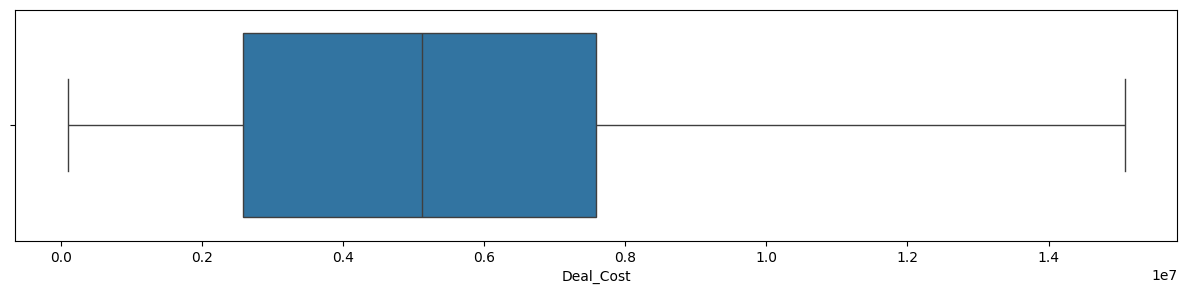

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=df['Deal_Cost'],orient='h')

# **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.get_dummies(df, columns=['VP_Name','Manager_Name','Client_Category', 'Solution_Type', 'Sector', 'Location', 'Client_Size', 'Deal_Risk_Factor'])

In [ ]:
df['Deal_Won_Lost']=df['Deal_Won_Lost'].replace({'Lost': 0, 'Won':1})

In [ ]:
print(f"Shape of the original data: {df.shape}")


Shape of the original data: (11876, 44)


In [ ]:
df.tail()

,Deal_ID,Deal_Cost,Deal_Won_Lost,Deal_Probability,Contract_Length_Months,Client_Revenue,Solution_Price,Client_Satisfaction_Score,VP_Name_Emma Johnson,VP_Name_James Wilson,...,Location_London,Location_New York,Location_Sydney,Location_Tokyo,Client_Size_Large,Client_Size_Medium,Client_Size_Small,Deal_Risk_Factor_High,Deal_Risk_Factor_Low,Deal_Risk_Factor_Medium
13123,11676,133395.516,0,0.439,42,208413021.777,3549293.658,9.221,False,True,...,False,False,True,False,False,True,False,True,False,False
13124,4712,9393412.604,1,0.324,47,461611661.070,7361002.065,5.507,False,True,...,True,False,False,False,False,False,True,False,False,True
13126,11918,2557230.193,0,0.272,52,41913522.312,6964962.572,5.260,False,False,...,False,False,True,False,True,False,False,True,False,False
13127,1419,9246479.702,0,0.501,19,386461732.855,798028.159,1.744,False,True,...,False,False,False,True,False,False,True,True,False,False
13128,3549,6267395.681,1,0.972,47,247188395.716,4671647.747,7.166,False,True,...,False,False,False,False,False,True,False,True,False,False


# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
train = df.copy()

In [ ]:
train

,Deal_ID,Deal_Cost,Deal_Won_Lost,Deal_Probability,Contract_Length_Months,Client_Revenue,Solution_Price,Client_Satisfaction_Score,VP_Name_Emma Johnson,VP_Name_James Wilson,...,Location_London,Location_New York,Location_Sydney,Location_Tokyo,Client_Size_Large,Client_Size_Medium,Client_Size_Small,Deal_Risk_Factor_High,Deal_Risk_Factor_Low,Deal_Risk_Factor_Medium
0,2632,1332011.204,0,0.470,44,164230898.377,247548.948,5.839,False,False,...,False,False,False,True,True,False,False,False,True,False
1,7255,5300924.705,0,0.367,54,151685725.817,3223614.287,5.212,True,False,...,False,False,False,True,False,True,False,True,False,False
2,7591,563230.725,0,0.231,40,226885343.975,2054130.290,5.593,False,True,...,False,True,False,False,False,True,False,True,False,False
4,6789,1585861.045,1,0.251,23,69704319.523,2881628.609,7.566,True,False,...,False,False,False,False,True,False,False,False,True,False
5,8823,3103209.992,0,0.312,42,103811830.430,3143416.442,9.387,True,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,11676,133395.516,0,0.439,42,208413021.777,3549293.658,9.221,False,True,...,False,False,True,False,False,True,False,True,False,False
13124,4712,9393412.604,1,0.324,47,461611661.070,7361002.065,5.507,False,True,...,True,False,False,False,False,False,True,False,False,True
13126,11918,2557230.193,0,0.272,52,41913522.312,6964962.572,5.260,False,False,...,False,False,True,False,True,False,False,True,False,False
13127,1419,9246479.702,0,0.501,19,386461732.855,798028.159,1.744,False,True,...,False,False,False,True,False,False,True,True,False,False


## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
y = train['Deal_Won_Lost']
X = train.drop(columns=['Deal_Won_Lost'],inplace=True)

In [ ]:
trainX=[]
testX=[]
trainY=[]
testY=[]
X = train

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.25, random_state=30, stratify=y)

In [ ]:
rf.set_params(n_estimators=110,min_samples_split=4,min_samples_leaf=6,max_features= None,max_depth=5
                ,bootstrap=False)

RandomForestClassifier(bootstrap=False, max_depth=5, max_features=None,
                       min_samples_leaf=6, min_samples_split=4,
                       n_estimators=110)

In [ ]:
rf.fit(trainX,trainY)

RandomForestClassifier(bootstrap=False, max_depth=5, max_features=None,
                       min_samples_leaf=6, min_samples_split=4,
                       n_estimators=110)

In [ ]:
pred_test_y = rf.predict(testX)
pred_train_y = rf.predict(trainX)

In [ ]:
acc = accuracy_score(testY,pred_test_y)

In [ ]:
acc

0.4910744358369821

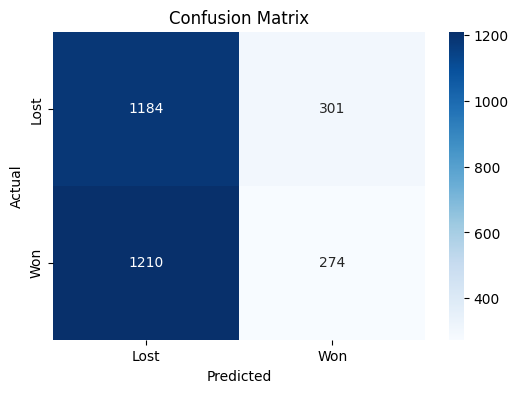

In [ ]:
conf_matrix = confusion_matrix(testY, pred_test_y)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Lost", "Won"], yticklabels=["Lost", "Won"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(testY, pred_test_y))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.80      0.61      1485
           1       0.48      0.18      0.27      1484

    accuracy                           0.49      2969
   macro avg       0.49      0.49      0.44      2969
weighted avg       0.49      0.49      0.44      2969



In [ ]:
print("Accuracy of training dataset:",accuracy_score(trainY, pred_train_y)*100,'%')
print("Precision of training dataset:",precision_score(trainY, pred_train_y)*100,'%')
print("Recall of training dataset:",recall_score(trainY, pred_train_y)*100,'%')

Accuracy of training dataset: 53.16043561243965 %
Precision of training dataset: 58.1764705882353 %
Recall of training dataset: 22.224719101123597 %


In [ ]:
print("Accuracy of testing dataset:",accuracy_score(testY, pred_test_y)*100,'%')
print("Precision of testing dataset:",precision_score(testY, pred_test_y)*100,'%')
print("Recall of testing dataset:",recall_score(testY, pred_test_y)*100,'%')

Accuracy of testing dataset: 49.10744358369821 %
Precision of testing dataset: 47.65217391304348 %
Recall of testing dataset: 18.463611859838274 %


## K-Nearset Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_train_pred_knn=knn_model.predict(trainX)
y_test_pred_knn = knn_model.predict(testX)

In [ ]:
print(classification_report(trainY, y_train_pred_knn))
print('*'*20)
print(classification_report(testY, y_test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4457
           1       1.00      1.00      1.00      4450

    accuracy                           1.00      8907
   macro avg       1.00      1.00      1.00      8907
weighted avg       1.00      1.00      1.00      8907

********************
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1485
           1       0.50      0.50      0.50      1484

    accuracy                           0.50      2969
   macro avg       0.50      0.50      0.50      2969
weighted avg       0.50      0.50      0.50      2969



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(trainX, trainY)
    y_test_pred_knn = knn_model.predict(testX)
    error.append(np.mean(y_test_pred_knn != testY))

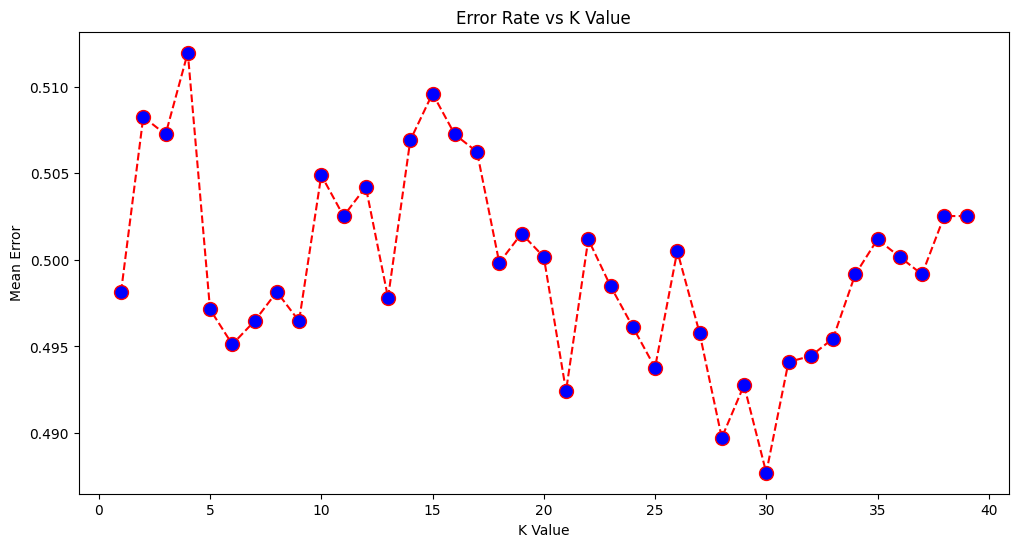

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=30)

In [ ]:
knn_model.fit(trainX,trainY)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_train_pred_knn = knn_model.predict(trainX)
y_test_pred_knn = knn_model.predict(testX)

Text(0.5, 427.9555555555555, 'Predicted label')

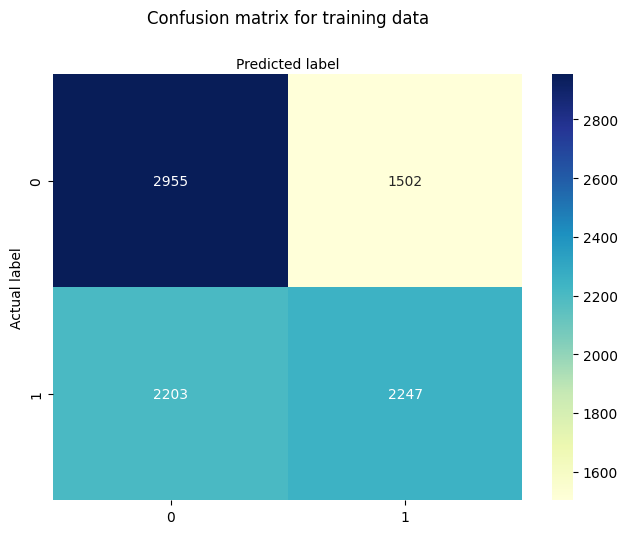

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(trainY, y_train_pred_knn)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for training data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy of training dataset:",accuracy_score(trainY, y_train_pred_knn)*100,'%')
print("Precision of training dataset:",precision_score(trainY, y_train_pred_knn)*100,'%')
print("Recall of training dataset:",recall_score(trainY, y_train_pred_knn)*100,'%')

Accuracy of training dataset: 58.40350286291681 %
Precision of training dataset: 59.93598292878101 %
Recall of training dataset: 50.4943820224719 %


In [ ]:
print("Accuracy of testing dataset:",accuracy_score(testY, y_test_pred_knn)*100,'%')
print("Precision of testing dataset:",precision_score(testY, y_test_pred_knn)*100,'%')
print("Recall of testing dataset:",recall_score(testY, y_test_pred_knn)*100,'%')

Accuracy of testing dataset: 51.22937015830246 %
Precision of testing dataset: 51.43540669856459 %
Recall of testing dataset: 43.463611859838274 %


In [ ]:
y_pred_test_prob_knn=knn_model.predict_proba(testX)[::,1]

In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(testY,  y_pred_test_prob_knn)
auc_knn = roc_auc_score(testY, y_pred_test_prob_knn)

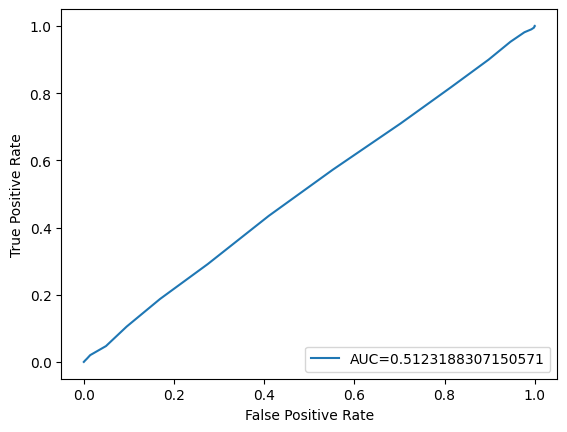

In [ ]:
plt.plot(fpr_knn,tpr_knn,label="AUC="+str(auc_knn))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()